In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
import warnings
warnings.simplefilter('ignore')
import math


In [105]:
train1=pd.read_csv('/Users/yangyangwang/kaggle/Sberbank-Russian-Housing-Market/subtest.csv')
train_para=pd.read_csv('/Users/yangyangwang/kaggle/Sberbank-Russian-Housing-Market/test.csv',parse_dates=['timestamp'])
#train1=train1[['id','price_doc']]
train2=pd.read_csv('/Users/yangyangwang/kaggle/Sberbank-Russian-Housing-Market/src/sub.csv')
#print train1.head()
train=pd.merge(train1,train2,on='id',how='left')
#train1['diff']=train1['price_doc']-train2['price_doc']
train['diff']=train['price_doc_x']-train['price_doc_y']
test=pd.merge(train1,train_para[['id','timestamp']],on='id',how='left')
test['year']=test['timestamp'].dt.year
test['month']=test['timestamp'].dt.month
test['monthlable']=(test['year']-2011)*12+test['month']-8
train.head()

,id,price_doc_x,price_doc_y,diff
0,30474,5112439.5,5108804.5,3635.0
1,30475,7378965.5,7948657.0,-569691.5
2,30476,4617629.5,5259827.5,-642198.0
3,30477,5472490.0,5604683.0,-132193.0
4,30478,4693751.5,4882159.5,-188408.0


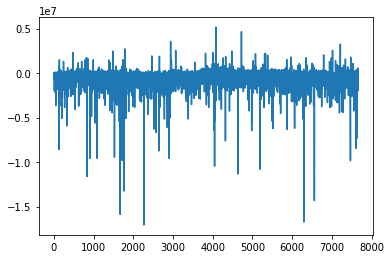

In [3]:
plt.plot(train['diff'])
plt.show()

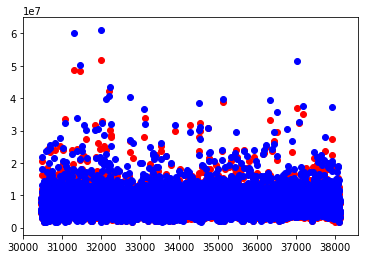

In [4]:
plt.scatter(train1['id'],train1['price_doc'], color='red', linewidth=1)
plt.scatter(train2['id'],train2['price_doc'], color='blue', linewidth=1)
plt.show()

In [5]:
index=[ 0.        , -0.12979167, -0.06225729,  0.04301432, -0.54546668,
       -0.0279693 , -0.19891019, -0.01912201, -0.29596432, -0.11190281,
       -0.0337845 ,  0.06060359, -0.07259107, -0.05360242, -0.0143999 ,
        0.0098536 , -0.01415826, -0.04802682, -0.02340639, -0.01028776,
       -0.0345184 , -0.00614133,  0.01029633,  0.01805034,  0.02419643,
       -0.01011189, -0.04899105,  0.04365876,  0.00166993, -0.02839624,
       -0.06715049, -0.01279624, -0.04224324,  0.02696803, -0.01755245,
        0.03320922, -0.12555446,  0.0474596 ,  0.03434393,  0.0159236 ,
        0.07032679,  0.11852761,  0.17623506,  0.08682129,  0.08784605,
        0.09067468,  0.03988077]
index=np.exp(index)

In [6]:
index

array([ 1.        ,  0.87827838,  0.9396411 ,  1.04395284,  0.57957125,
        0.97241822,  0.8196235 ,  0.98105966,  0.74381397,  0.89413115,
        0.96677982,  1.06247765,  0.92998105,  0.94780886,  0.98570328,
        1.00990231,  0.9859415 ,  0.95310822,  0.97686541,  0.98976498,
        0.96607056,  0.99387749,  1.01034952,  1.01821423,  1.02449154,
        0.98993906,  0.95218965,  1.04462583,  1.00167133,  0.97200314,
        0.93505447,  0.98728528,  0.95863657,  1.02733496,  0.9826007 ,
        1.0337668 ,  0.88200773,  1.04860384,  1.03494049,  1.01605106,
        1.07285872,  1.12583796,  1.19271839,  1.09070174,  1.09182002,
        1.09491275,  1.04068669])

In [7]:
plt.plot(index)

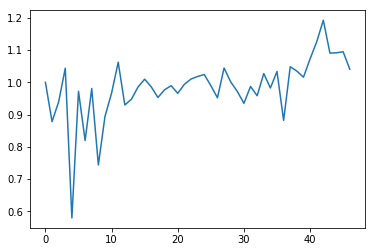

In [8]:
plt.show()

In [42]:
def diff_priceindex(data):
    timerange=len(data);
    array=[None]*timerange
    for i in range(1,timerange):
        array[i]=data[i]-data[i-1]
    return array[1:]   
diffindex=diff_priceindex(index)   

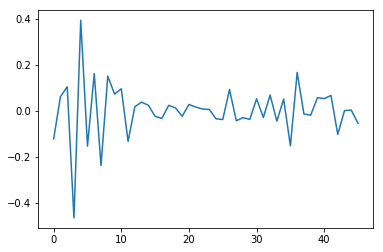

In [107]:
plt.plot(diffindex)
plt.show()


In [90]:
am = arch_model(diffindex) 
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     39,   Neg. LLF: -46.0306243857
Iteration:     10,   Func. Count:     70,   Neg. LLF: -49.3653107741
Iteration:     15,   Func. Count:    100,   Neg. LLF: -49.8598965996
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -49.8599880654
            Iterations: 17
            Function evaluations: 113
            Gradient evaluations: 16
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:                49.8600
Distribution:                  Normal   AIC:                          -91.7200
Method:            Maximum Likelihood   BIC:                          -84.4054
                                        No. Observations:                   46
Date:                Sun, May 13

In [87]:
res.params


mu          0.983545
omega       0.000342
alpha[1]    0.362914
beta[1]     0.637086
Name: params, dtype: float64

In [11]:
res.resid

array([ 0.01645487, -0.10526674, -0.04390403,  0.06040772, -0.40397388,
       -0.01112691, -0.16392163, -0.00248547, -0.23973116, -0.08941397,
       -0.0167653 ,  0.07893253, -0.05356408, -0.03573627,  0.00215815,
        0.02635718,  0.00239637, -0.0304369 , -0.00667971,  0.00621985,
       -0.01747456,  0.01033236,  0.02680439,  0.0346691 ,  0.04094641,
        0.00639394, -0.03135548,  0.0610807 ,  0.0181262 , -0.01154198,
       -0.04849065,  0.00374016, -0.02490855,  0.04378983, -0.00094443,
        0.05022167, -0.1015374 ,  0.06505871,  0.05139536,  0.03250593,
        0.0893136 ,  0.14229283,  0.20917326,  0.10715661,  0.1082749 ,
        0.11136762,  0.05714156])

In [12]:
res.conditional_volatility

array([ 0.11972442,  0.09783776,  0.10228307,  0.08778745,  0.08109321,
        0.25250203,  0.20249892,  0.19030988,  0.15302986,  0.19004848,
        0.16203086,  0.13103463,  0.1163697 ,  0.10005304,  0.08475319,
        0.07014241,  0.06106198,  0.05214896,  0.04909972,  0.04352105,
        0.03953158,  0.03805832,  0.0361045 ,  0.03785791,  0.04112544,
        0.04503312,  0.04060602,  0.04182435,  0.05301349,  0.04745248,
        0.04271896,  0.04855896,  0.04300373,  0.04177744,  0.04636658,
        0.0413761 ,  0.04845658,  0.07469607,  0.07370698,  0.06900546,
        0.06131172,  0.07504556,  0.10619787,  0.15298955,  0.13935816,
        0.13026616,  0.12511606])

In [108]:
def arch_pred(res,pred_num):
    condition_vol = res.conditional_volatility[-1:].tolist()
     #上两个条件异方差值
    resid=[res.resid[-1]]
    len(res.params)
#np.random.seed(0)
    normal = np.random.normal(0, 1, pred_num)
    mean=[]
#print normal
    for i in range(pred_num):
    #print res.params['omega']
    #print res.params['alpha[1]']
    #print resid[-1] 
        new_con_vol = res.params['omega'] + res.params['alpha[1]']*math.pow(resid[-1],2)+res.params['beta[1]']*condition_vol[-1]
        new_normal=normal[i]
        new_resid=math.sqrt(new_con_vol)*new_normal
    #print math.pow(new_con_vol,0.5)
        new_mean=res.params['mu']+new_resid
    #print new_con_vol
        condition_vol.append(new_con_vol)
        resid.append(new_resid)
        mean.append(new_mean)
    return mean


In [109]:
diffindex_pred(res,1)

[0.010004339435197847]

In [110]:
total=np.array([np.zeros(1)])
#print total
for i in range(10000):
    mean=diffindex_pred(res,1)
    #print mean
    total=np.append(total,[mean],axis=0)
total=total[1:] 
mean=np.mean(total,axis=0)
mean=mean.tolist()
print mean


[-0.003138470903301695]


In [111]:
plt.plot(diffindex+mean)

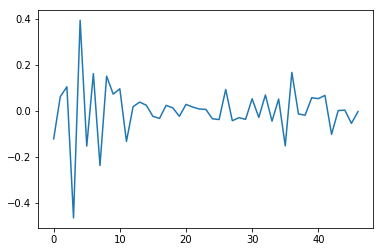

In [112]:
plt.show()

In [114]:
def priceindex_from_diff(init,diffindex):
    num_index=len(diffindex)
    priceindex=[init]
    for i in range(num_index):
        priceindex.append(priceindex[-1]+diffindex[i])
    return priceindex[1:]    


In [115]:
priceindex_pred=priceindex_from_diff(index[-1],mean)
priceindex_pred

[1.0375482148181607]

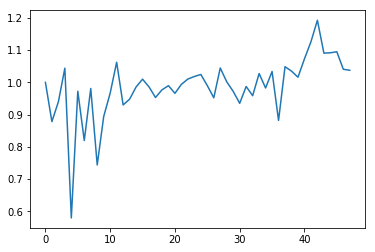

In [117]:
plt.plot(index.tolist()+priceindex_pred)
plt.show()

In [118]:
test['price_doc']=test['price_doc']*priceindex_pred

In [119]:
test

,id,price_doc,timestamp,year,month,monthlable
0,30474,5.304402e+06,2015-07-01,2015,7,47
1,30475,7.656032e+06,2015-07-01,2015,7,47
2,30476,4.791013e+06,2015-07-01,2015,7,47
3,30477,5.677972e+06,2015-07-01,2015,7,47
4,30478,4.869993e+06,2015-07-01,2015,7,47
5,30479,8.999872e+06,2015-07-01,2015,7,47
6,30480,4.286845e+06,2015-07-01,2015,7,47
7,30481,4.084708e+06,2015-07-01,2015,7,47
8,30482,4.409170e+06,2015-07-01,2015,7,47
9,30483,4.442128e+06,2015-07-01,2015,7,47


In [120]:
train=pd.merge(train,test[['id','price_doc']],on='id')
train['diff2']=train['price_doc']-train['price_doc_x']

In [121]:
train


,id,price_doc_x,price_doc_y,diff,price_doc,diff2
0,30474,5112439.50,5.108804e+06,3635.000,5.304402e+06,191962.976591
1,30475,7378965.50,7.948657e+06,-569691.500,7.656032e+06,277066.981730
2,30476,4617629.50,5.259828e+06,-642198.000,4.791013e+06,173383.744417
3,30477,5472490.00,5.604683e+06,-132193.000,5.677972e+06,205482.230110
4,30478,4693751.50,4.882160e+06,-188408.000,4.869993e+06,176241.989625
5,30479,8674172.00,9.211691e+06,-537519.000,8.999872e+06,325699.673626
6,30480,4131707.00,4.174296e+06,-42589.000,4.286845e+06,155138.222002
7,30481,3936885.25,4.146926e+06,-210040.500,4.084708e+06,147823.013081
8,30482,4249604.50,4.832014e+06,-582409.000,4.409170e+06,159565.062658
9,30483,4281370.50,4.507382e+06,-226011.500,4.442128e+06,160757.819250


In [122]:
outputFile = 'test_priceindex.csv'
train[['id','price_doc']].to_csv(outputFile,index=False)


In [123]:
plt.plot(train['diff2'])

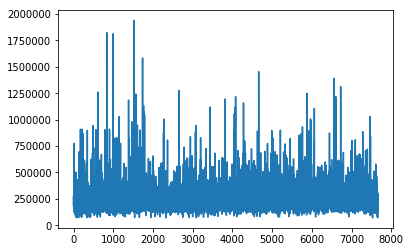

In [124]:
plt.show()

In [ ]:
test